In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
fake = pd.read_csv('D:\\6th Sem\\Project- Fake News Detection\\Python Model FN\\Fake.csv',encoding='latin1')
true = pd.read_csv('D:\\6th Sem\\Project- Fake News Detection\\Python Model FN\\True.csv',encoding='latin1')

In [3]:
fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
fake.tail(5)

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied âSafe Zoneâ Plan ...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [5]:
true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17


In [6]:
true.tail(5)

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,22-Aug-17
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,22-Aug-17
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,22-Aug-17
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,22-Aug-17
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,22-Aug-17


In [7]:
fake['target'] = 'FAKE'
true['target'] = 'REAL'

In [8]:
true.head(5)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,REAL
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,REAL
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,REAL
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,REAL
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,REAL


In [9]:
data = pd.concat([fake, true]).reset_index(drop = True)
data

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,22-Aug-17,REAL
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,22-Aug-17,REAL
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,22-Aug-17,REAL
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,22-Aug-17,REAL


In [10]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)
data.head()

,title,text,subject,date,target
0,U.S. seeks meeting soon to revive Asia-Pacific...,WASHINGTON (Reuters) - The United States wants...,worldnews,27-Oct-17,REAL
1,"Yemen air strike kills eight women, two childr...",DUBAI (Reuters) - Eight women and two children...,worldnews,18-Dec-17,REAL
2,Candidate Handelâs Excellent Response to Ale...,We should not allow our political differences...,left-news,"Jun 14, 2017",FAKE
3,"FPL shuts one reactor in Florida, reduces powe...",(Reuters) - Florida Power & Light shut Unit 4 ...,worldnews,11-Sep-17,REAL
4,THESE 11 GOP SENATORS Tweeted Support for McCo...,Arrogant and smug is what we d call McConnell ...,politics,"Aug 11, 2017",FAKE


In [11]:
data.drop(["date"],axis=1,inplace=True)
data.drop(["title"],axis=1,inplace=True)
data

,text,subject,target
0,WASHINGTON (Reuters) - The United States wants...,worldnews,REAL
1,DUBAI (Reuters) - Eight women and two children...,worldnews,REAL
2,We should not allow our political differences...,left-news,FAKE
3,(Reuters) - Florida Power & Light shut Unit 4 ...,worldnews,REAL
4,Arrogant and smug is what we d call McConnell ...,politics,FAKE
...,...,...,...
44893,Ankara (Reuters) - The United Nations General ...,worldnews,REAL
44894,"SOCHI, Russia (Reuters) - Russian President Vl...",worldnews,REAL
44895,(Reuters) - A Democratic Missouri state senato...,politicsNews,REAL
44896,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,REAL


In [12]:
data.isnull().any()

text       False
subject    False
target     False
dtype: bool

In [13]:
data['text'] = data['text'].apply(lambda x: x.lower())
data

,text,subject,target
0,washington (reuters) - the united states wants...,worldnews,REAL
1,dubai (reuters) - eight women and two children...,worldnews,REAL
2,we should not allow our political differences...,left-news,FAKE
3,(reuters) - florida power & light shut unit 4 ...,worldnews,REAL
4,arrogant and smug is what we d call mcconnell ...,politics,FAKE
...,...,...,...
44893,ankara (reuters) - the united nations general ...,worldnews,REAL
44894,"sochi, russia (reuters) - russian president vl...",worldnews,REAL
44895,(reuters) - a democratic missouri state senato...,politicsNews,REAL
44896,washington (reuters) - president barack obama ...,politicsNews,REAL


In [14]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
data['text'] = data['text'].apply(punctuation_removal)
data

,text,subject,target
0,washington reuters the united states wants a ...,worldnews,REAL
1,dubai reuters eight women and two children fr...,worldnews,REAL
2,we should not allow our political differences...,left-news,FAKE
3,reuters florida power light shut unit 4 at t...,worldnews,REAL
4,arrogant and smug is what we d call mcconnell ...,politics,FAKE
...,...,...,...
44893,ankara reuters the united nations general ass...,worldnews,REAL
44894,sochi russia reuters russian president vladim...,worldnews,REAL
44895,reuters a democratic missouri state senator i...,politicsNews,REAL
44896,washington reuters president barack obama on ...,politicsNews,REAL


In [15]:
#stopwords removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head(50)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HZT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,subject,target
0,washington reuters united states wants meeting...,worldnews,REAL
1,dubai reuters eight women two children yemeni ...,worldnews,REAL
2,allow political differences escalate violent a...,left-news,FAKE
3,reuters florida power light shut unit 4 turkey...,worldnews,REAL
4,arrogant smug call mcconnell spoke group telli...,politics,FAKE
5,cleveland reuters cleveland police friday tigh...,politicsNews,REAL
6,cannon ball nd reuters tensions increased week...,politicsNews,REAL
7,washington reuters us house speaker paul ryan ...,politicsNews,REAL
8,atlanta reuters hundreds thousands floridians ...,worldnews,REAL
9,nairobi reuters kenya repeat presidential poll...,worldnews,REAL


In [16]:
print(data['text'])

0        washington reuters united states wants meeting...
1        dubai reuters eight women two children yemeni ...
2        allow political differences escalate violent a...
3        reuters florida power light shut unit 4 turkey...
4        arrogant smug call mcconnell spoke group telli...
                               ...                        
44893    ankara reuters united nations general assembly...
44894    sochi russia reuters russian president vladimi...
44895    reuters democratic missouri state senator faci...
44896    washington reuters president barack obama frid...
44897    earlier week prominent members gop like mitt r...
Name: text, Length: 44898, dtype: object


In [17]:
print(data.target)

0        REAL
1        REAL
2        FAKE
3        REAL
4        FAKE
         ... 
44893    REAL
44894    REAL
44895    REAL
44896    REAL
44897    FAKE
Name: target, Length: 44898, dtype: object


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


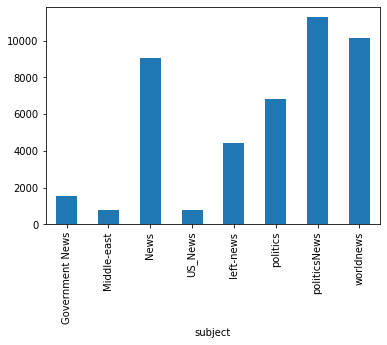

  Fig1. Count of news articles in different subjects


In [39]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()
print("  Fig1. Count of news articles in different subjects")


target
FAKE    23481
REAL    21417
Name: text, dtype: int64


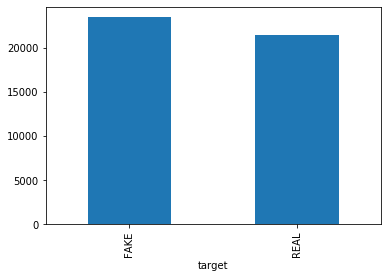

   Fig2. Count of Fake and Real news in the dataset


In [38]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()
print("   Fig2. Count of Fake and Real news in the dataset")

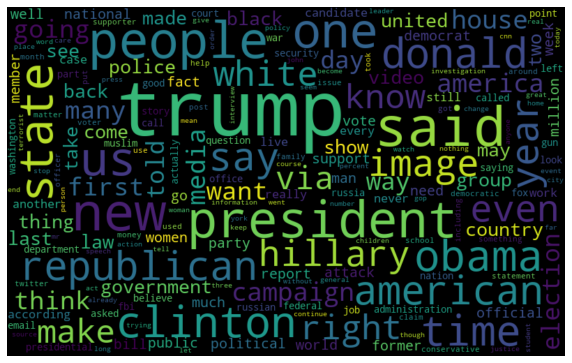

                     Fig3. Wordcloud for fake news


In [49]:
# Word cloud for fake news

from wordcloud import WordCloud

fake_data = data[data["target"] == "FAKE"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
print("                     Fig3. Wordcloud for fake news")



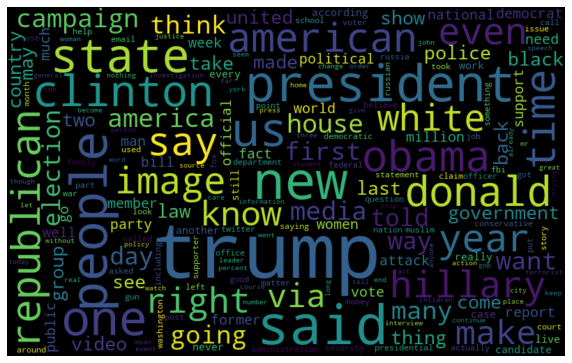

                     Fig4. Wordcloud for real news


In [50]:
# Word cloud for real news

from wordcloud import WordCloud

real_data = data[data["target"] == "REAL"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
print("                     Fig4. Wordcloud for real news")


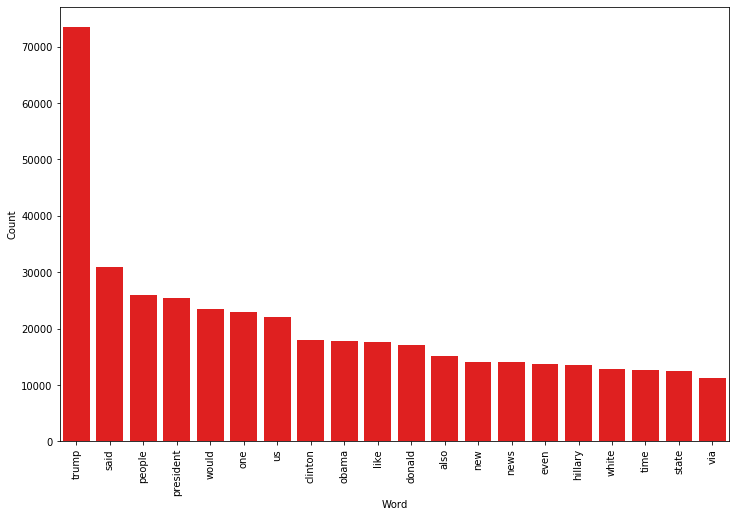

                                 Fig5. Most frequent words in fake news


In [51]:
# Most frequent words counter
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter1(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'red')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()
    print("                                 Fig5. Most frequent words in fake news")
    


# Most frequent words in fake news
counter1(data[data["target"] == "FAKE"], "text", 20)

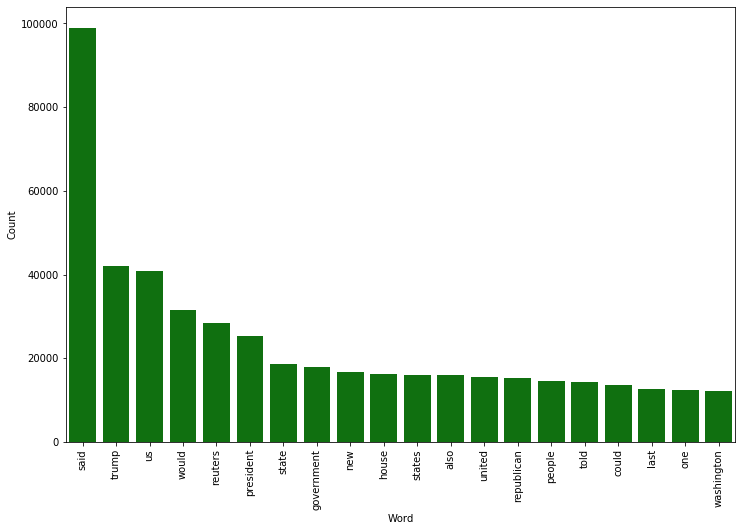

                                  Fig6. Most frequent words in real news


In [52]:
# Most frequent words counter
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'green')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()     
    print("                                  Fig6. Most frequent words in real news") 


counter(data[data["target"] == "REAL"], "text", 20)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2)

In [25]:
#tfidf_vectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                    ('nbmodel', MultinomialNB())])

In [27]:
model = pipeline.fit(x_train,y_train)

In [28]:
score = pipeline.score(x_test,y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 96.11%


In [29]:
pred = model.predict(x_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        FAKE       0.98      0.95      0.96      4650
        REAL       0.95      0.97      0.96      4330

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



In [31]:
print(confusion_matrix(y_test, pred))

[[4413  237]
 [ 112 4218]]


In [32]:
pickle.dump(model, open('model.pkl','wb'))  
model = pickle.load(open('model.pkl','rb'))

In [33]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


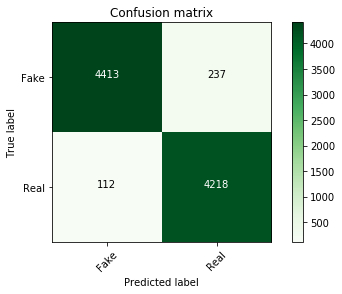

In [34]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [35]:
print(model.predict(["How elite leftists celebrate America s Independence Day The Kennedy clan gathered at their Hyannis Port compound on Cape Cod over the weekend for their annual Fourth of July festivities, and took some time to attack Donald Trump.Robert F. Kennedy Jr. s daughter Kathleen, between known as Kick, posted a photos of a pinata of The Donald from a family party over the weekend. It s yuge party!,  wrote Kick in the caption of the Instagram post, which also showed some of her family members milling about in the background.She later deleted the Instagram post just before 11am on Monday.Via: Daily Mail"]))

['FAKE']
